# Mathematics of Poker 

**Part II Chapter 4: Expoitive Play**<br>
Pot Odds and Implied Odds


----------------

#### A Toy Game



**Example 4.1**
<div class = example>


Two players plan heads up limit poker on the river. <br>


The pot is 4 BB. <br>
Player A has either the nuts (20% of the time) or valueless hand (80% of the time). <br>
Player B always has a middle strength hand -- enough to beat the valueless hands, but of course not enough to beat the nuts. <br>
Both Players know the each others' ranges. 
Player A plays first. <br>



Now suppose that A checks. Now if B bets, A knows whether his hand is a winning hand. This means that he can play perfectly against B by raising all of his nutted hands and fold at least most of his valueless hands. So B cannot gain an edge by betting. 

So A will bet all of his nut hands first to act and some of his bluffs. <br>

We can let his bluff frequency be equal to $x \in [0,1]$ 

A selection of $x$ defines his strategy. 

Continue to consider B's strategy. We know that B _loses_ 1 BB by calling when he is beat and wins 5 BB when calling when he is winning. 
<br>5BB = 4BB Pot + 1BB bet. 
    
What is expectation of B calling 100% of the time for a given $x$? 
    
</div>


In [151]:
# this is equal to the sum of 
# the probability that A is betting with the nuts * -1BB
# plus the probability that A is bluffing * 5BB

def B_STRAT_EXP(x):
    # val1 = p_nuts * -1
    # val2 = p_bluff * 5
    
    return(.2 * -1) + 5*x

Now we can make a table to view consider some of the scenarios across A's bluffing frequencies. 

In [173]:
import pandas as pd 

COLUMNS = ['x', 'B_CALL100_EV']

# 0 to .8 is 100% of the range since 20% of the time, A has the nuts
X_FREQUENCY_LIST = [0, 0.01, 0.02, 0.04, .1, .3, .5, .7, .8] 

def generate_data(frequency_list):
    results = []
    for x in frequency_list:
        data = x, B_STRAT_EXP(x)
        results.append(data)
        
    return results


def make_chart(COLUMNS, data, frequency_list):
    df = pd.DataFrame(data=data, columns=COLUMNS)
    df.index = ["Bluff %  " for x in frequency_list]
    return df
    

In [174]:
df = make_chart(COLUMNS, data = generate_data(X_FREQUENCY_LIST), frequency_list=X_FREQUENCY_LIST)
df

,x,B_CALL100_EV
Bluff %,0.00,-0.20
Bluff %,0.01,-0.15
Bluff %,0.02,-0.10
Bluff %,0.04,0.00
Bluff %,0.10,0.30
Bluff %,0.30,1.30
Bluff %,0.50,2.30
Bluff %,0.70,3.30
Bluff %,0.80,3.80


Let's visualize how B's EV of calling 100% changes as A's bluff frequency varies for some more values. 

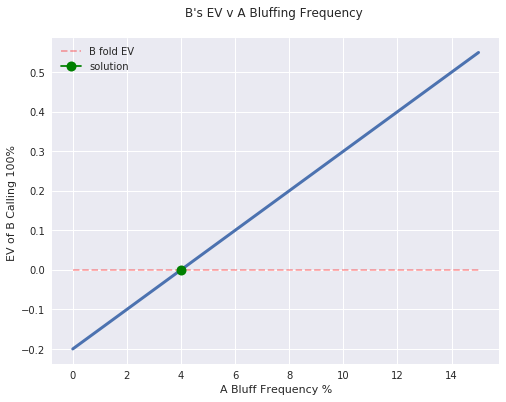

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df = make_chart(COLUMNS, data = generate_data([0, 0.01, 0.02, 0.04, .1, .15]), frequency_list=[0, 0.01, 0.02, 0.04, .1, .15])

fig = plt.figure(figsize=(8,6))
plt.plot(df.x*100, df.B_CALL100_EV, linewidth=3)
plt.plot(df.x*100, [0 for i in df.x], 'r--', alpha=.35, label = 'B fold EV')
plt.plot([4], [0], marker='o', markersize=10, color="green", label='solution') # the intersection
plt.legend(loc='upper left')

plt.title("B's EV v A Bluffing Frequency \n")
plt.xlabel("A Bluff Frequency %")
plt.ylabel("EV of B Calling 100% ")


plt.savefig('Example-4.1-BluffFrequencyVEV.png')
plt.show()

You can conclude that the optimal bluffing frequency for A is less than or equal 4%. If he bluffs anymore than this, B will start to call profitably 100%. 

### Pot Odds
**Example 4.2**

<div class = example>

The game is 30-60 Limit Holdem. <br>
Player A has AcAd. Player B has 9h8h. <br>

The board is:    Kh, 2h, 3h, 7c, __ <br>

The pot is 400. <br>

Suppose that the _cards are face up_ so both players know one another's cards. This implies that there will be no bluffing nor calling on the river, so we're only concerned with this street. Remember that since this is Limit, A can only bet a Maximum of 60. <br>

Similarly, there are 9 out of 44 remaining cards that give B the win (the remaining 9 hearts) and the any of the remaining 35 cards means A wins. 

Let's reason about the strategies for A and B and calculate their value. 

First suppose that A checks. Note B will bet with a frequency of 0%, since B is always getting called by a better hand when betting. 

So let's calculate the value of A checking 100% to start. 
    
   </div>

In [155]:
# let's calculate the value of a strategy where A checks 100% of the time. 

# A_CHECK = prob(A wins) * (pot size) since B will never bet the turn with a worse hand. 

A_CHECK = (35/44) * (400)
print("A CHECK Value: ", round(A_CHECK,2))

A CHECK Value:  318.18


The value of A checking is about 318.18 <br>

Now we can evaluate a strategy where B only calls. 

In [156]:
# B_CALL = p(B wins) * (new pot size) - (size of A's bet)
# the size of A's bet and the cost of a call are equivalent

B_CALL = (9/44) * (400 + 60 + 60) - (60)
print("B CALL Value: ", round(B_CALL, 2))

B CALL Value:  46.36


You can see that the expectation (or value of the strategy) for B here is +46.36. In our framework, the EV of folding is 0. So B should choose calling since 46.36 (call) > 0 (fold). 

<br>
Now calculate the value of A betting. 

We could divide this scenario into parts, one where B calls and one where B folds. <br> 
But, since we expect B to fold with a frequency of 0%, we can only concern ourselves with the former. 

In [157]:
# A_BET  = prob(A win) * (new pot size) -  (bet size)

A_BET = (35/44) * (400 + 60 + 60) -  60

print("A BET Value: ", round(A_BET,2))

A BET Value:  353.64


Notice that the value to A of betting is larger than the value we obtained by evaluating A checking. 

353.64 (A BET) > 318.18 (A CHECK)

In this scenario, B has enough equity to call even though B is behind and A will always prefer betting to checking. <br>
**So, what is the minimum equity B must have to prefer calling to folding?**

Since we know that folding has an EV of 0, we plot B's EV of always calling as a function of his equity to visualize a solution.

In [158]:
# create a function which calculates the EV of B's strategy of always calling given some equity, 

def B_CALL_EV_GIVEN_EQUITY(equity, POT_SIZE = 400, BET_SIZE = 60):
    
    # same calculation as before
    B_CALL_EV = equity * (POT_SIZE + BET_SIZE + BET_SIZE) - BET_SIZE
    
    return B_CALL_EV

# let's verify this given our first calculation above with equity = 9/44

# pretty print
print("VERIFY Flush EV with 9 outs: ", round(B_CALL_EV_GIVEN_EQUITY(9/44), 2)) 


VERIFY Flush EV with 9 outs:  46.36


In [159]:
# now that the function seems to be working correctly, let's plot this for some equities

def make_chart(equity_list):
    EV_ARRAY = []
    for equity in equity_list:
        EV_ARRAY.append(B_CALL_EV_GIVEN_EQUITY(equity))
        
    # for pretty printing
    EV_ARRAY = [round(i, 2) for i in EV_ARRAY]
    
    COLUMNS = ['B_EV_CALL']
    INDEX = [round(i*100, 1) for i in equity_list]
    
    df = pd.DataFrame(data = EV_ARRAY, index=INDEX, columns=COLUMNS)
    df.index.name = 'EQUITY %'
    return df
  
import numpy as np
# create some equities 
equities = np.linspace(start=0, stop=.5, num=9)
df = make_chart(equities)    

In [160]:
df

,B_EV_CALL
EQUITY %,
0.0,-60.0
6.2,-27.5
12.5,5.0
18.8,37.5
25.0,70.0
31.2,102.5
37.5,135.0
43.8,167.5
50.0,200.0


So, what is the solution? What is the minum equity that B must have to call profitably? We can see that this is when B's equity $x$ is somewhere $ 6.2 \% < x < 12.5 \% $  Let's calculate this directly. 

<div class = math>
    
Find the minimum equity B must have to always call. This is when the function is equal to 0. <br>
    
You can solve the inequality:
    
$B_{\text{equity}} * \text{new potsize - bet size} > 0 $


$$x * 520 - 60 > 0$$

$$x > 60 / 520 $$

$$x > 3 / 26 $$

$$x \gtrapprox 11.54 \% $$
    
<div> 

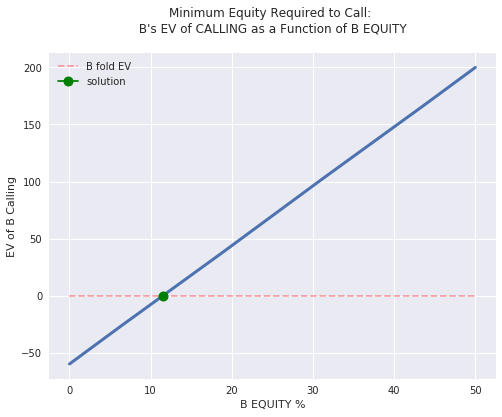

In [163]:
# let's plot this 
fig = plt.figure(figsize=(8,6))
plt.plot(df.index.values, df.B_EV_CALL, linewidth=3)
plt.plot(df.index.values, [0 for i in df.index.values], 'r--', alpha=.35, label = 'B fold EV')
plt.plot([11.53], [0], marker='o', markersize=10, color="green", label='solution') 
plt.legend(loc='upper left')

plt.title("Minimum Equity Required to Call: \n B's EV of CALLING as a Function of B EQUITY \n")
plt.xlabel("B EQUITY %")
plt.ylabel("EV of B Calling")


plt.savefig('Example-4.2-POTODDS-CALLING-FREQ.png')
plt.show()

In [162]:
# we can also use some functions from scipy
from scipy.optimize import fsolve

starting_guess = 0.0 # lower bound equity to start checking

answer = fsolve(B_CALL_EV_GIVEN_EQUITY, starting_guess)[0]
print ("SOLUTION EQUITY: ", round(answer*100, 2), "%")

SOLUTION EQUITY:  11.54 %


This is the minimum equity that B must have to call profitably. 

### Pot Odds on Multiple Streets

_Examples 4.3, 4.4, 4.5, and 4.6 are left as an exercise to the reader_ This is a simple extension of the method above.


### Implied Odds

In some sense, **Implied Odds** take advantage of the fact that, since poker is an imperfect information game, 
there can often be betteing on future streets after a drawing player has hit their hand. This implies that the drawing player can profitbaly draw with hands that _do not_ have the immediate pot odds to call. 

In the text, the authors define implied odds:

``` The combination of immediate odds and the expected value from later streets is called implied odds```

Let's take a look at an example. 

**Example 4.7**

<div class = example>
    Now we are in an imperfect informaiton game where the players do not know the cards of the other players. 
    Player A holds Ad Kd <br>
    Player B holds 8c 7c <br>
    
    
    
</div>
    

In [180]:
# custom style
from IPython.core.display import HTML
def css_styling():
    styles = open("../_style/custom.css", "r").read()
    return HTML(styles)
css_styling()